# Question 2: Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?

The type of complaint I found from question 1 that needed to be focused on first is heating. To answer this question, we need to look at the geographical data of housing with heating problems.

## Import libraries and dataset

In [4]:
# basic libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

# import cleaned 311 dataset
NY311_df = pd.read_csv("NY311_df_clean")
NY311_df.head()


,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,15629728,2010-01-01 00:00:00,2010-01-12 00:00:00,HEATING,RESIDENTIAL BUILDING,11210.0,3101 FOSTER AVENUE,FOSTER AVENUE,ADDRESS,BROOKLYN,Closed,The Department of Housing Preservation and Dev...,Unspecified,40.638696,-73.946969
1,15629899,2010-01-01 00:00:00,2010-01-16 00:00:00,PLUMBING,RESIDENTIAL BUILDING,11106.0,31-54 29 STREET,29 STREET,ADDRESS,ASTORIA,Closed,The Department of Housing Preservation and Dev...,Unspecified,40.764035,-73.925935
2,15630099,2010-01-01 00:00:00,2010-01-01 00:00:00,HEATING,RESIDENTIAL BUILDING,10466.0,1405 EAST 233 STREET,EAST 233 STREET,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,Unspecified,40.888997,-73.836192
3,15630315,2010-01-01 00:00:00,2010-01-16 00:00:00,PLUMBING,RESIDENTIAL BUILDING,11106.0,31-54 29 STREET,29 STREET,ADDRESS,ASTORIA,Closed,The Department of Housing Preservation and Dev...,Unspecified,40.764035,-73.925935
4,15630431,2010-01-01 00:00:00,2010-01-02 00:00:00,HEATING,RESIDENTIAL BUILDING,11226.0,22 MARTENSE STREET,MARTENSE STREET,ADDRESS,BROOKLYN,Closed,More than one complaint was received for this ...,Unspecified,40.651236,-73.958293


## Create new heating dataframe
We will create a new heating dataframe to focus on the problem we are most worried about. Also as we are answering a question regarding location of complaints, we will drop columns that are not useful or relevant.

In [6]:
heating_df = NY311_df[NY311_df["Complaint Type"]=="HEATING"].reset_index()
heating_df.drop(["index", "Created Date", "Unique Key", "Resolution Description", "Closed Date", "Location Type", "Address Type"], axis=1, inplace=True)
heating_df.head()

,Complaint Type,Incident Zip,Incident Address,Street Name,City,Status,Borough,Latitude,Longitude
0,HEATING,11210.0,3101 FOSTER AVENUE,FOSTER AVENUE,BROOKLYN,Closed,Unspecified,40.638696,-73.946969
1,HEATING,10466.0,1405 EAST 233 STREET,EAST 233 STREET,BRONX,Closed,Unspecified,40.888997,-73.836192
2,HEATING,11226.0,22 MARTENSE STREET,MARTENSE STREET,BROOKLYN,Closed,Unspecified,40.651236,-73.958293
3,HEATING,11212.0,1115 WILLMOHR STREET,WILLMOHR STREET,BROOKLYN,Closed,Unspecified,40.657228,-73.917447
4,HEATING,11210.0,3103 FOSTER AVENUE,FOSTER AVENUE,BROOKLYN,Closed,Unspecified,40.638696,-73.946947


### How many heating complaints do we have?

In [27]:
print("There are", heating_df.shape[0], "complaints")
print("Open cases:", (heating_df["Status"]=="Open").sum())
print("Closed cases:", (heating_df["Status"]=="Closed").sum())
print("Pending cases:", (heating_df["Status"]=="Pending").sum())

There are 2149424 complaints
Open cases: 16091
Closed cases: 2133331
Pending cases: 2


## Let's explore the frequency of complaints depending on location

### Number of complaints for each borough

In [7]:
# Create a dataframe for number of complaints for each borough
borough_df=pd.DataFrame({"Number of Complaints": heating_df.groupby(["Borough"]).size()}).reset_index()
borough_df.drop(5, axis=0, inplace=True)
borough_df.sort_values(by="Number of Complaints", ascending=False, inplace=True)
borough_df.head()

,Borough,Number of Complaints
0,BRONX,606133
1,BROOKLYN,574845
2,MANHATTAN,423039
3,QUEENS,244122
4,STATEN ISLAND,18368


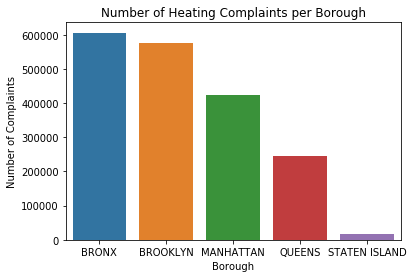

In [8]:
# Visualise the dataframe

ax = sns.barplot(x="Borough", y="Number of Complaints", data=borough_df)
ax.set_title("Number of Heating Complaints per Borough")
plt.show()

We see that from the plot that the Bronx has the most complaints relating to heating compared to the rest. Brooklyn however, come in second only by a small amount. Staten Island has the lowest amount of heating complaints by a lot.

### Find the top 10 zip codes with the most heating complaints

In [9]:
zip_df = pd.DataFrame({"Number of Complaints": heating_df.groupby(["Incident Zip"]).size()}).reset_index()
zip_df.sort_values(by="Number of Complaints", ascending=False, inplace=True)
zip_df.head(10)

,Incident Zip,Number of Complaints
126,11226.0,69041
81,10467.0,66073
72,10458.0,65372
82,10468.0,58190
67,10453.0,57818
66,10452.0,49802
71,10457.0,46885
28,10031.0,44777
37,10040.0,44478
70,10456.0,44051


Zip code 11226 has the most complaints with 69041 complaints

### Find the top 5 addresses with the most heating complaints

In [10]:
address_df = pd.DataFrame({"Number of Complaints": heating_df.groupby(["Incident Address"]).size()}).reset_index()
address_df.sort_values(by="Number of Complaints", ascending=False, inplace=True)
address_df.head(5)

,Incident Address,Number of Complaints
78534,34 ARDEN STREET,13858
130062,89-21 ELMHURST AVENUE,11548
85085,3810 BAILEY AVENUE,7115
2320,1025 BOYNTON AVENUE,5785
134607,9511 SHORE ROAD,5006
